# Assignment I: Credit Card Fraud Detection 

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





In [2]:
#download data
#!unzip creditcard.csv.zip

## Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 
* What assumptions can we make about the data?
* What problems are we expecting?

**Asumptions**
* The values in Class are true 
* 


**Expected Problems**
* Dataset is highly unbalanced
* Overfitting
* 


# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


#Limit float to two decimal places
pd.set_option("display.float", "{:.2f}".format)

In [2]:
#read csv and print head
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
# check if there are no NaN Values and get infos about the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().all()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
# Split the cases into class==1 and class==0 and print some basic statistics regarding amount and time (alternativly with groupby Amount and Time)

fraud = df[df["Class"]==1]
print (fraud.Amount.describe())
print()
print (fraud.Time.describe())

count    492.00
mean     122.21
std      256.68
min        0.00
25%        1.00
50%        9.25
75%      105.89
max     2125.87
Name: Amount, dtype: float64

count      492.00
mean     80746.81
std      47835.37
min        406.00
25%      41241.50
50%      75568.50
75%     128483.00
max     170348.00
Name: Time, dtype: float64


In [6]:
nofraud = df[df["Class"]==1]
print (nofraud.Amount.describe())
print()
print (nofraud.Time.describe())

count    492.00
mean     122.21
std      256.68
min        0.00
25%        1.00
50%        9.25
75%      105.89
max     2125.87
Name: Amount, dtype: float64

count      492.00
mean     80746.81
std      47835.37
min        406.00
25%      41241.50
50%      75568.50
75%     128483.00
max     170348.00
Name: Time, dtype: float64


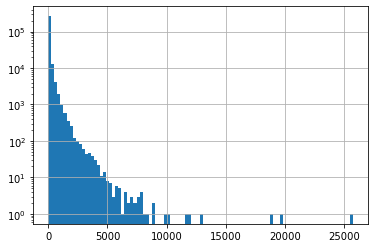

In [7]:
#Show distribution of transaction amount in logarithmic scale
df.Amount.hist(bins=100, log=True)

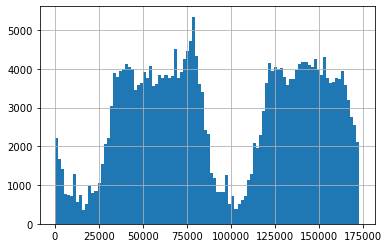

In [8]:
#Show the card transactions over time
df.Time.hist(bins=100)

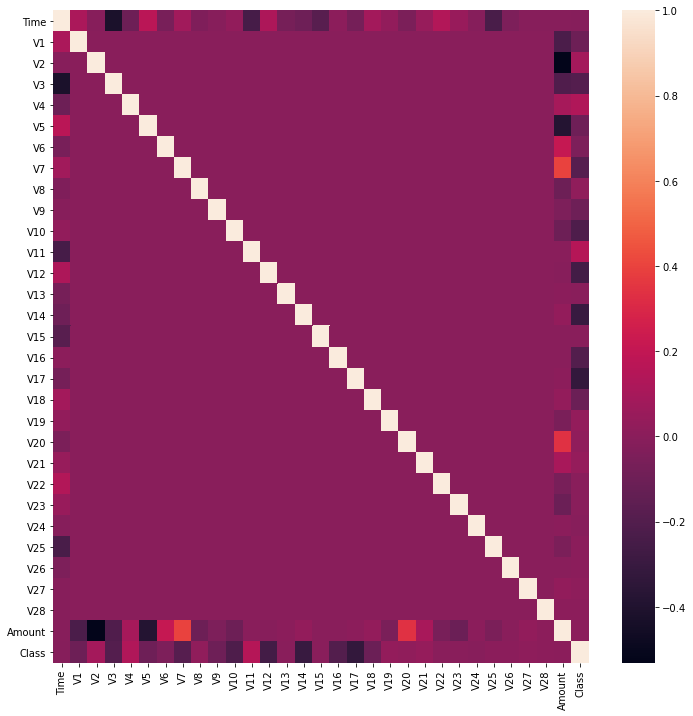

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr())

# Task 3: Dataset Preparation + Validation
* Should we pepare a validation set? Or use other approaches? -> do so.
* How should we meassure the quality of our model?

In [10]:
X = df.drop("Class", axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Task 4: Train a Gaussian Naive Bayes Classifier
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?

See: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB


In [11]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
yhat = bayes.predict(X_test)
yhat.shape

(28481,)

In [13]:
acc = accuracy_score(y_test, yhat, normalize=True)
#recall score
prec = precision_score(y_test, yhat)
#confusion matrix
print (acc)
print (prec)

0.9928022190232084
0.1336405529953917


# Around 50 failures
* Train the model with more fraud cases to prevent overfitting
* weight the cases in class to reward the model for finding fraud cases